In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from category_encoders import TargetEncoder

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline

In [3]:
airline = pd.read_csv("C:\\Users\\antho\\Documents\\Data Science\\Data\\airline.csv", index_col='id')

In [4]:
airline.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
airline.shape

(103904, 24)

In [6]:
# Change column names to lower case and remove spaces
airline.columns = airline.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')
airline.columns

Index(['unnamed:_0', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [7]:
airline.isnull().sum()

unnamed:_0                             0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

In [8]:
airline.drop(labels='unnamed:_0', axis=1, inplace=True)

In [9]:
# Impute missing values with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
airline['arrival_delay_in_minutes'] = imputer.fit_transform(airline[['arrival_delay_in_minutes']])

In [8]:
airline.sample(5)

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
105747,Female,Loyal Customer,40,Business travel,Business,3185,2,4,4,4,...,2,2,2,2,1,2,4,0,0.0,neutral or dissatisfied
33796,Female,disloyal Customer,22,Business travel,Eco,1284,3,3,3,4,...,5,1,1,4,1,4,5,0,11.0,neutral or dissatisfied
52501,Male,Loyal Customer,30,Business travel,Business,2259,1,3,3,3,...,1,4,5,4,2,3,1,0,12.0,neutral or dissatisfied
115944,Female,Loyal Customer,69,Personal Travel,Eco,337,1,4,1,4,...,4,4,1,4,3,4,5,0,8.0,neutral or dissatisfied
44929,Female,Loyal Customer,28,Business travel,Eco Plus,438,0,0,0,1,...,2,5,2,1,3,4,2,5,17.0,satisfied


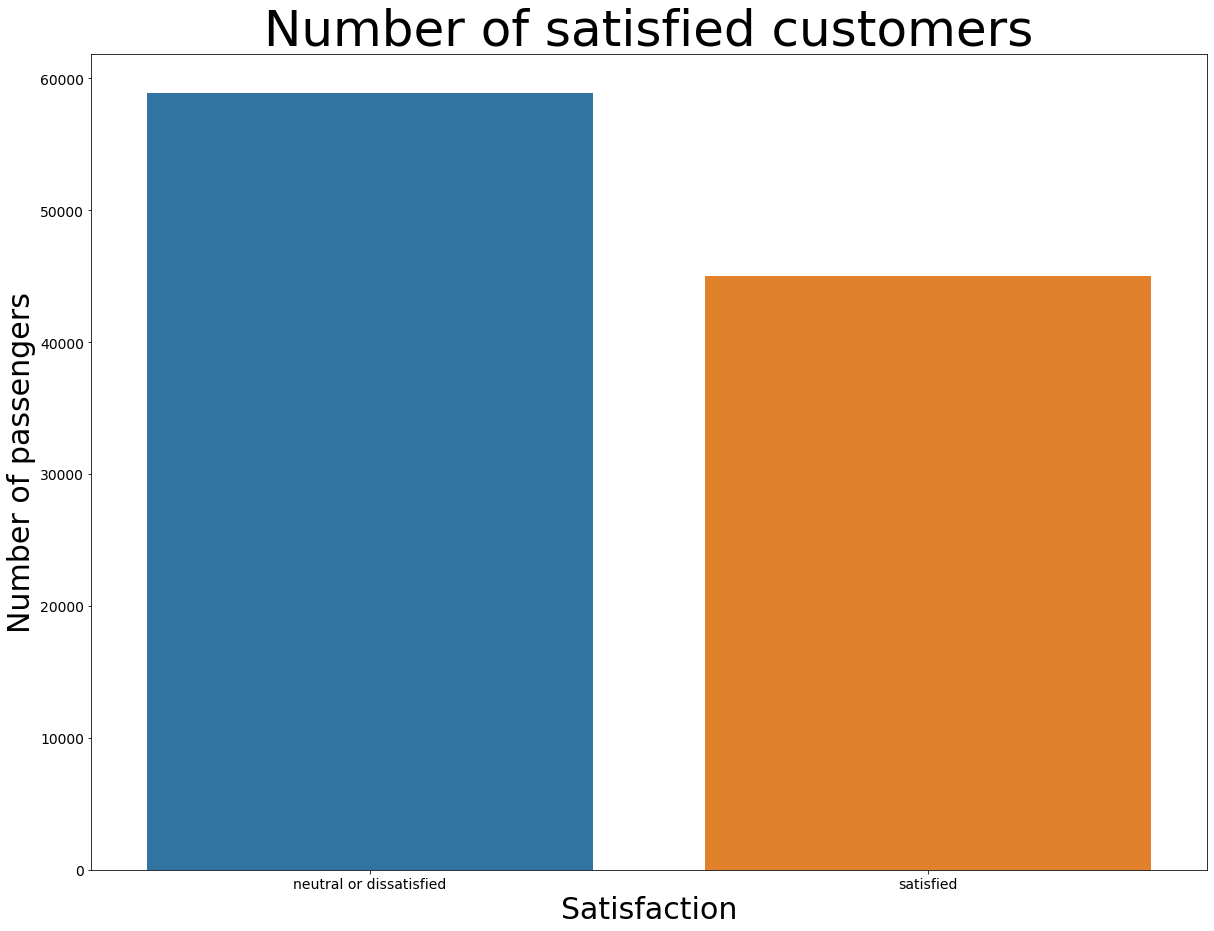

In [9]:
plt.figure(figsize=(20,15))
sns.countplot(x='satisfaction', data=airline)
plt.title('Number of satisfied customers', fontsize=50)
plt.ylabel('Number of passengers', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Satisfaction', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

In [10]:
airline.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [10]:
def bar_chart(airline, feature):
    satisfied = airline[airline['satisfaction']=='satisfied'][feature].value_counts(normalize=True)*100
    dissatisfied = airline[airline['satisfaction']=='neutral or dissatisfied'][feature].value_counts(normalize=True)*100
    df = pd.DataFrame([satisfied, dissatisfied])
    df.index = ['Satisfied','Dissatisfied']
    df.plot(kind='bar',stacked=True, figsize=(15,10))

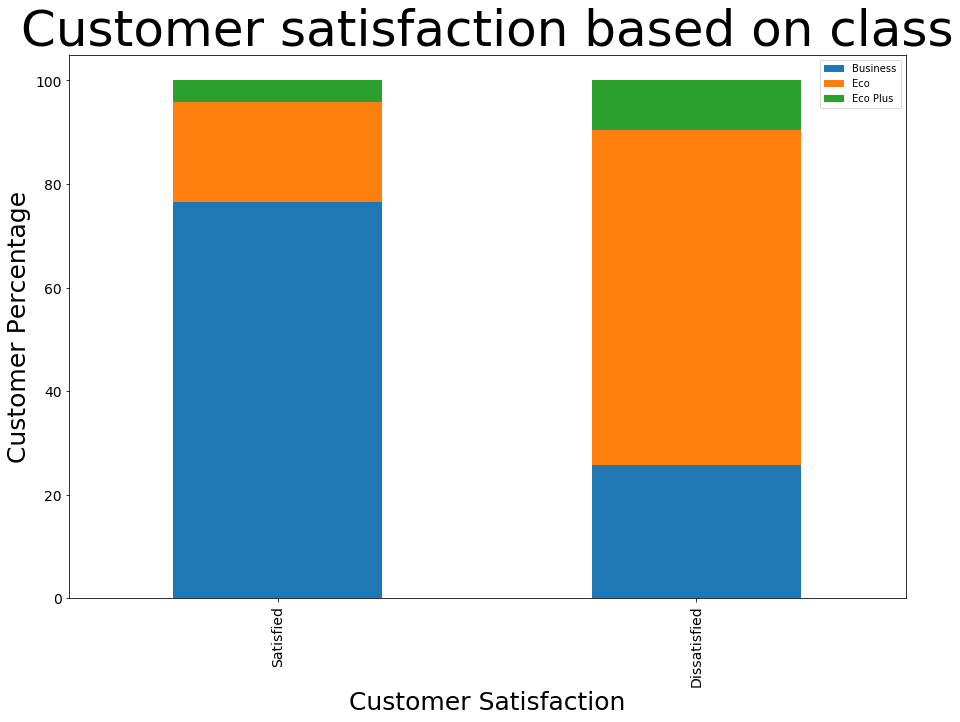

In [51]:
bar_chart(airline, 'class')
plt.title('Customer satisfaction based on class', fontsize=50)
plt.ylabel('Customer Percentage', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Customer Satisfaction', fontsize=25)
plt.xticks(fontsize=14)
plt.show()

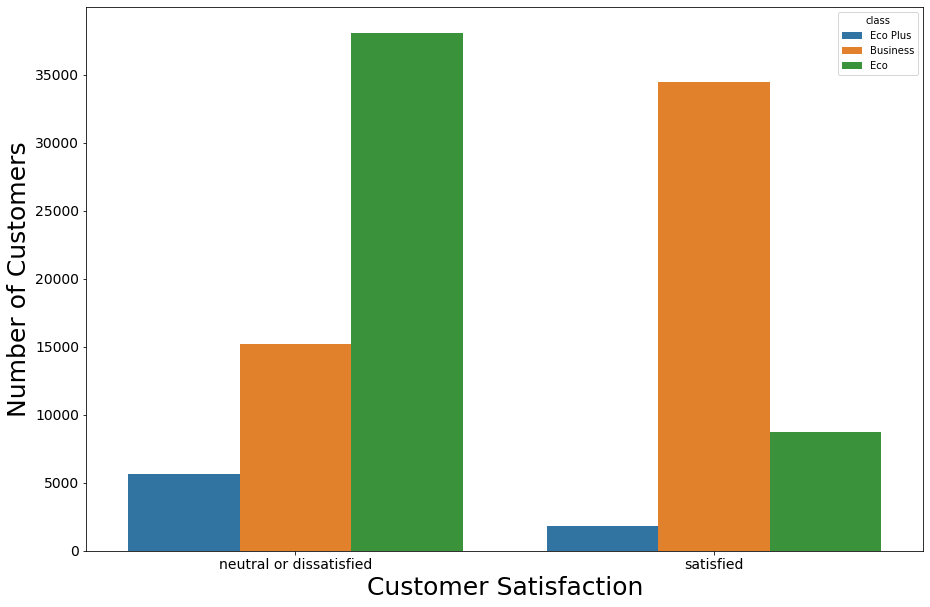

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='satisfaction', hue='class', data=airline)
#plt.title('Passenger Class', fontsize=50)
plt.ylabel('Number of Customers', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Customer Satisfaction', fontsize=25)
plt.xticks(fontsize=14)
plt.show()

In [10]:
airline.groupby(['satisfaction', 'class']).size()
#Business total = 49665 = 70%
#Eco total = 46745 = 81%

satisfaction             class   
neutral or dissatisfied  Business    15185
                         Eco         38044
                         Eco Plus     5650
satisfied                Business    34480
                         Eco          8701
                         Eco Plus     1844
dtype: int64

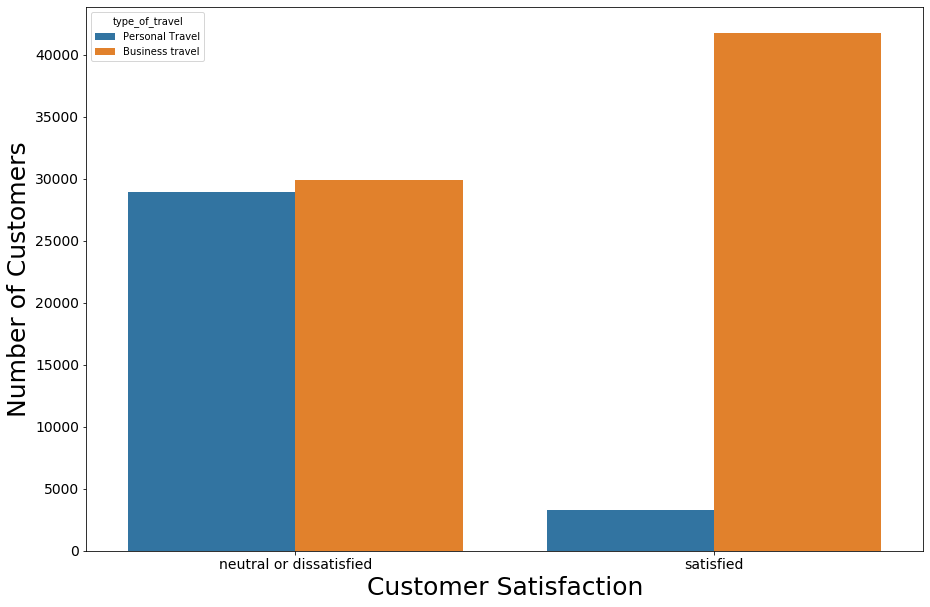

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='satisfaction', hue='type_of_travel', data=airline)
#plt.title('Purpose of Travel', fontsize=50)
plt.ylabel('Number of Customers', fontsize=25)
plt.yticks(fontsize=14)
plt.xlabel('Customer Satisfaction', fontsize=25)
plt.xticks(fontsize=14)
plt.show()

In [21]:
airline.groupby(['satisfaction', 'type_of_travel']).size()
# Business total: 71655 = 60% satisfied
# Leisure total: 32249 = 

satisfaction  type_of_travel 
0             Business travel    41746
              Personal Travel     3279
1             Business travel    29909
              Personal Travel    28970
dtype: int64

In [30]:
# Encode target variables
airline['satisfaction'] = pd.get_dummies(airline['satisfaction'])

In [31]:
target_encoder = TargetEncoder()
airline['customer_type'] = target_encoder.fit_transform(airline['customer_type'], airline['satisfaction'])

In [32]:
target_encoder = TargetEncoder()
airline['type_of_travel'] = target_encoder.fit_transform(airline['type_of_travel'], airline['satisfaction'])

In [33]:
target_encoder = TargetEncoder()
airline['class'] = target_encoder.fit_transform(airline['class'], airline['satisfaction'])

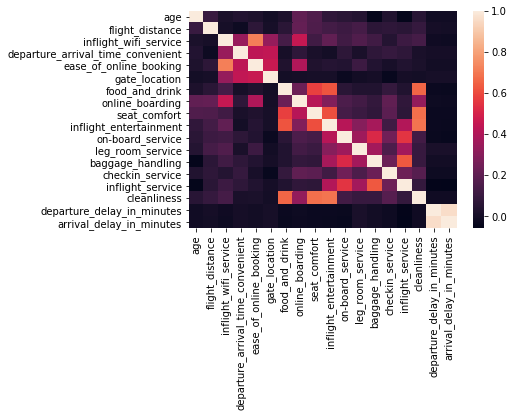

In [13]:
# Heat map
sns.heatmap(airline.corr())

In [14]:
# Correlation with target encoded
airline.corr().sort_values(by='satisfaction')

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
arrival_delay_in_minutes,-0.000347,-0.004815,-0.012105,0.005867,-0.014728,-0.002470,-0.019042,-0.000918,-0.007947,0.005178,...,-0.030597,-0.035089,0.011924,-0.008576,-0.020324,-0.058980,-0.015732,0.960247,1.000000,-0.057435
departure_arrival_time_convenient,-0.009142,0.206869,0.038125,-0.259763,-0.096870,-0.020043,0.343845,1.000000,0.436961,0.444757,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,-0.051601
departure_delay_in_minutes,-0.002935,-0.004036,-0.010152,0.005432,-0.010451,0.002158,-0.017402,0.001005,-0.006371,0.005467,...,-0.027489,-0.031569,0.014363,-0.005573,-0.018453,-0.054813,-0.014093,1.000000,0.960247,-0.050494
gender,1.000000,-0.031732,-0.008928,0.006909,-0.010634,-0.005828,-0.008974,-0.009142,-0.006951,-0.000333,...,-0.006117,-0.008156,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.000347,-0.012211
gate_location,-0.000333,-0.006078,-0.001330,0.030700,0.004526,0.004793,0.336248,0.444757,0.458655,1.000000,...,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178,0.000682
age,-0.008928,0.281674,1.000000,0.048524,0.138939,0.099461,0.017859,0.038125,0.024842,-0.001330,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167
ease_of_online_booking,-0.006951,0.019509,0.024842,0.133511,0.107436,0.065717,0.715856,0.436961,1.000000,0.458655,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947,0.171705
customer_type,-0.031732,1.000000,0.281674,-0.308333,0.085601,0.225200,0.007543,0.206869,0.019509,-0.006078,...,0.109930,0.056560,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,-0.004815,0.187638
food_and_drink,-0.005772,0.059454,0.023000,0.063439,0.087114,0.056994,0.134718,0.004906,0.031873,-0.001159,...,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466,0.209936
checkin_service,-0.010563,0.032177,0.035482,-0.016751,0.162501,0.073072,0.043193,0.093333,0.011081,-0.035427,...,0.120867,0.243914,0.153137,0.233122,1.000000,0.237197,0.179583,-0.018453,-0.020324,0.236174


In [7]:
feat = np.array(['In-flight Wifi', 'Flight Distance', 'Cleanliness', 'Leg Room', 'On-board Service', 'Seat Comfort', 'In-flight Entertainment', 'Type of Travel', 'Online Boarding', 'Class'])
vals = np.array([0.28, 0.29, 0.30, 0.31, 0.32, 0.35, 0.40, 0.45, 0.503, 0.504])

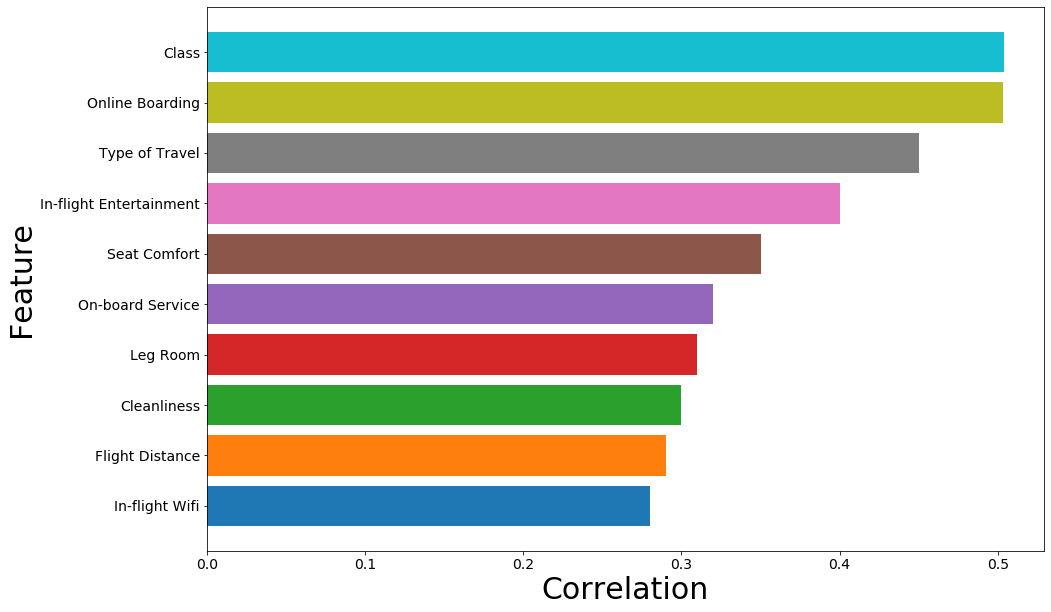

In [9]:
plt.figure(figsize=[15,10])
plt.barh(feat, vals, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])
#plt.title('Features with biggest impact', fontsize=50)
plt.ylabel('Feature', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Correlation', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

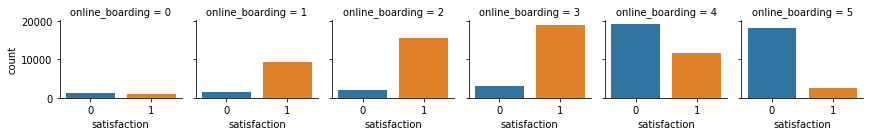

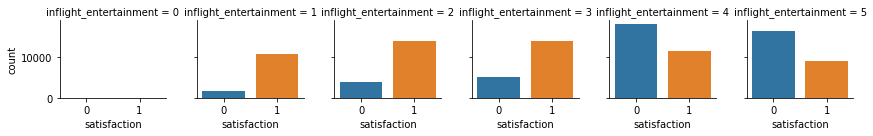

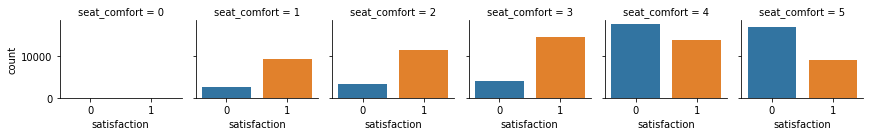

In [9]:
sns.catplot("satisfaction", col="online_boarding", data=airline, kind="count", height=2)
sns.catplot("satisfaction", col="inflight_entertainment", data=airline, kind="count", height=2)
sns.catplot("satisfaction", col="seat_comfort", data=airline, kind="count", height=2)

In [60]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,103904.0,0.507459,0.499947,0.0,0.0,1.0,1.0,1.0
customer_type,103904.0,0.817322,0.386404,0.0,1.0,1.0,1.0,1.0
age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
type_of_travel,103904.0,0.689627,0.462649,0.0,0.0,1.0,1.0,1.0
class,103904.0,0.477989,0.499518,0.0,0.0,0.0,1.0,1.0
flight_distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
gate_location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0


In [49]:
X = airline.drop(['satisfaction', 'gender', 'gate_location'], axis=1)
columns = X.columns
y = airline['satisfaction']

X = preprocessing.scale(X)

In [50]:
X = preprocessing.scale(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Build Model
logreg = LogisticRegression()

# Fit Model
logreg.fit(X_train, y_train)

# Score
from sklearn.metrics import accuracy_score
y_pred_train = logreg.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.8749082684696173

In [27]:
y_pred_test = logreg.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8757037678648766

In [98]:
predictions = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.83      0.83      0.83     11875
              satisfied       0.77      0.77      0.77      8906

               accuracy                           0.80     20781
              macro avg       0.80      0.80      0.80     20781
           weighted avg       0.80      0.80      0.80     20781



In [62]:
# Confusion Matrix
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

# True Positive: 13342
# True Negative: 9407
# False Positive: 1818
# False Negative: 1409

[[ 9407  1818]
 [ 1409 13342]]


In [32]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Accuracy is:  0.8759239297813366
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     11225
           1       0.88      0.90      0.89     14751

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



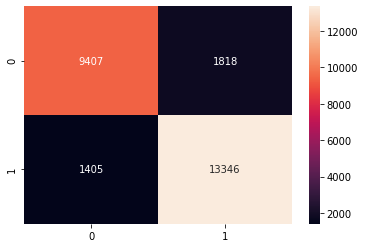

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create model
log_model = LogisticRegression(solver='liblinear')

# Train/Fit model
log_model.fit(X_train, y_train)

# Evaluate model
log_model.score(X_test, y_test)

y_pred = log_model.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

In [107]:
log_model.coef_

array([[-0.79340203,  0.121949  , -1.27148895, -0.36563546,  0.00868194,
        -0.52213533,  0.18363742,  0.16543985,  0.02661618, -0.82127965,
        -0.06959939, -0.06329776, -0.38712816, -0.32689359, -0.14686207,
        -0.41589994, -0.16903416, -0.31550169, -0.16223362,  0.33980253]])

<BarContainer object of 20 artists>

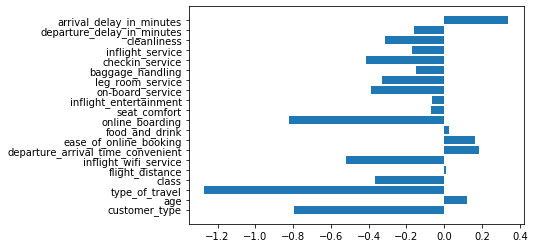

In [115]:
plt.barh(columns, log_model.coef_[0])

In [141]:
coefs = pd.DataFrame({"feature": columns, "coefficients": log_model.coef_[0]}).sort_values(by="coefficients")
coefs

,feature,coefficients
2,type_of_travel,-1.271489
9,online_boarding,-0.821280
0,customer_type,-0.793402
5,inflight_wifi_service,-0.522135
15,checkin_service,-0.415900
12,on-board_service,-0.387128
3,class,-0.365635
13,leg_room_service,-0.326894
17,cleanliness,-0.315502
16,inflight_service,-0.169034


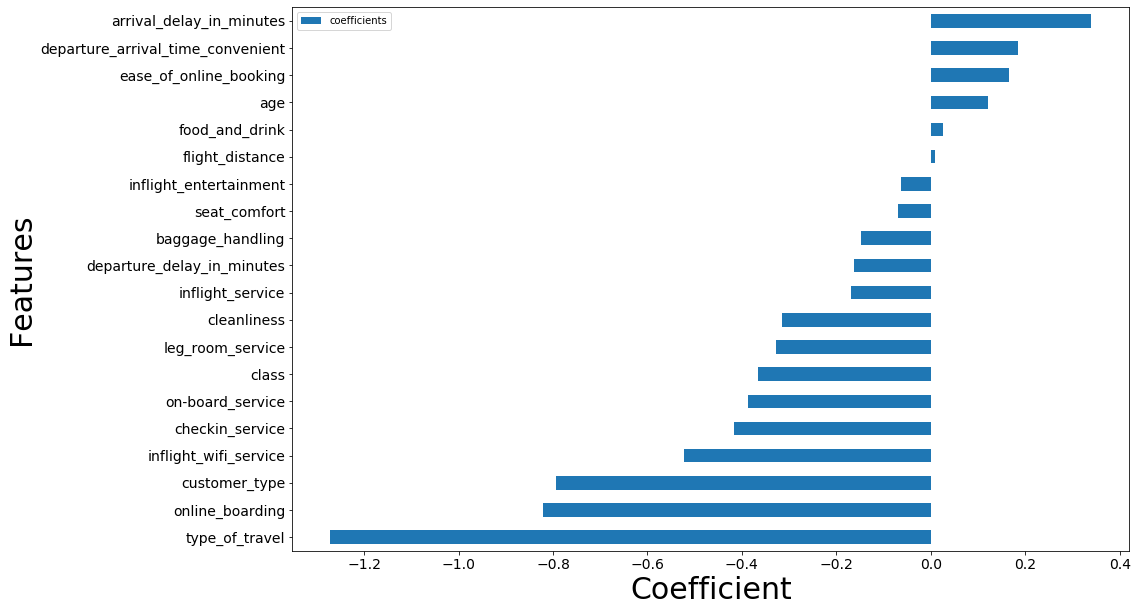

In [145]:
coefs.plot(x = 'feature', y = 'coefficients', kind='barh', figsize=(15,10))
#plt.title('Number of satisfied customers', fontsize=50)
plt.ylabel('Features', fontsize=30)
plt.yticks(fontsize=14)
plt.xlabel('Coefficient', fontsize=30)
plt.xticks(fontsize=14)
plt.show()

C:\Users\antho\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Accuracy is:  0.5059285494302433
                         precision    recall  f1-score   support

neutral or dissatisfied       0.57      0.51      0.54     14751
              satisfied       0.44      0.50      0.46     11225

               accuracy                           0.51     25976
              macro avg       0.50      0.50      0.50     25976
           weighted avg       0.51      0.51      0.51     25976



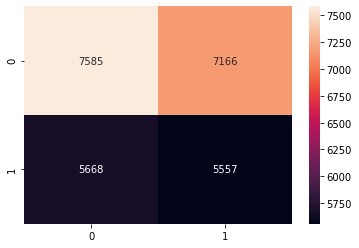

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Build SVC
svc_model = SVC(kernel='linear', probability=True, max_iter=10000)

# Train/Fit SVC
svc_model.fit(X_train, y_train)

# Evaluate SVC
svc_model.score(X_test, y_test)

y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

Accuracy is:  0.8661841700030798
                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.88     14751
              satisfied       0.86      0.82      0.84     11225

               accuracy                           0.87     25976
              macro avg       0.87      0.86      0.86     25976
           weighted avg       0.87      0.87      0.87     25976



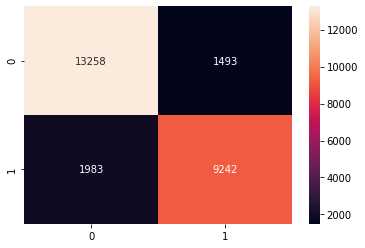

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Score 
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

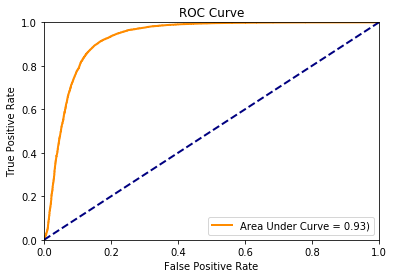

In [70]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds, pos_label=1)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'Area Under Curve = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()